In [1]:
# Linear algerabra 
import numpy as np
# Data processing , CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# Statical data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# functions for intracting with OS 
import os

In [2]:
for dirname,  _, filenames in os.walk ('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/train.csv
input/test.csv
input/gender_submission.csv


In [3]:
training = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.nan

all_data = pd.concat([training, test])
# print(all_data)

%matplotlib inline
all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
# Quick look at our data type, shape if dataset, and null counts

training.info()

# Check Age has 177 null values, Cabin and embarked also have few null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
# To better understand the numeric data, use .describe() method. Understand the central tendenciesof data

training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
# Quick way to separate numeric columns

training.describe().columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [7]:
# Look at numeric(countable) and categorical(categorized) values seprately

df_numeric = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_categry = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

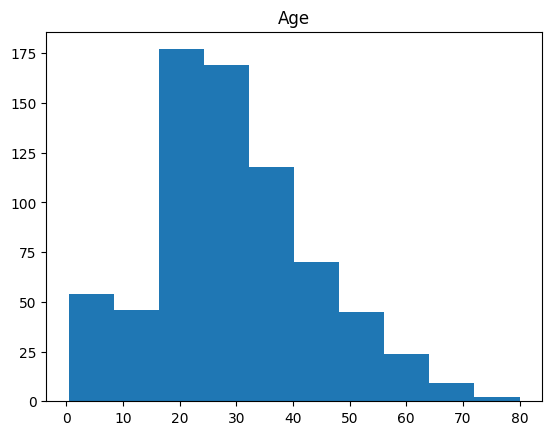

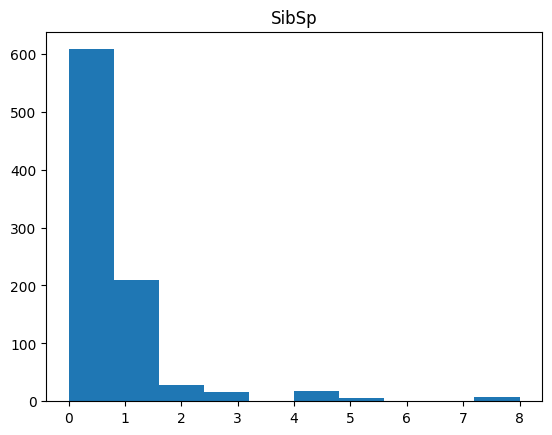

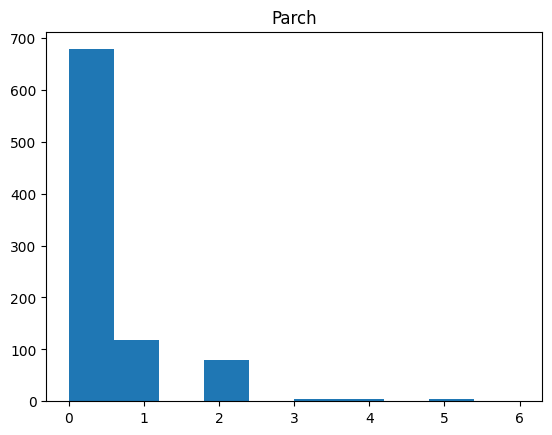

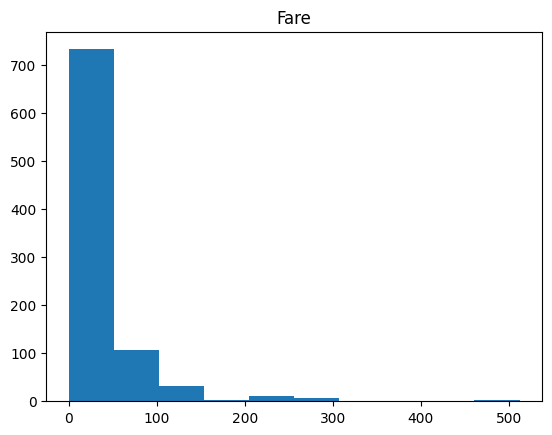

In [8]:
# Distribution for all numeric varibles

for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

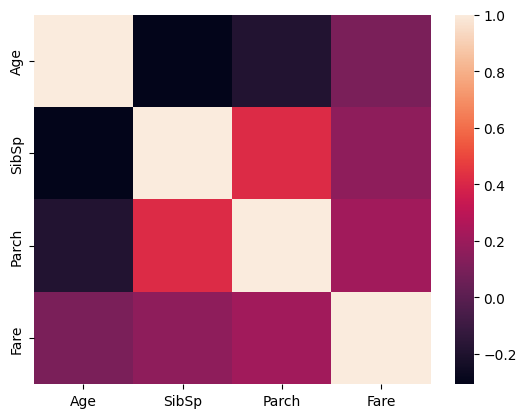

In [9]:
print(df_numeric.corr())
sns.heatmap(df_numeric.corr())

In [10]:
#compare survival rate across numeric variables
# pd.pivot_table is used for tabular out of data 
pd.pivot_table(training, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


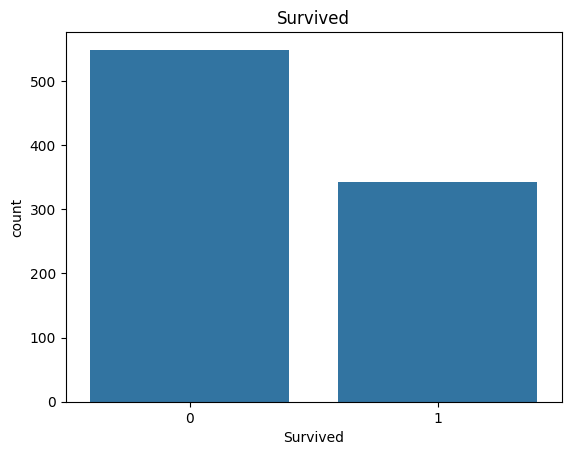

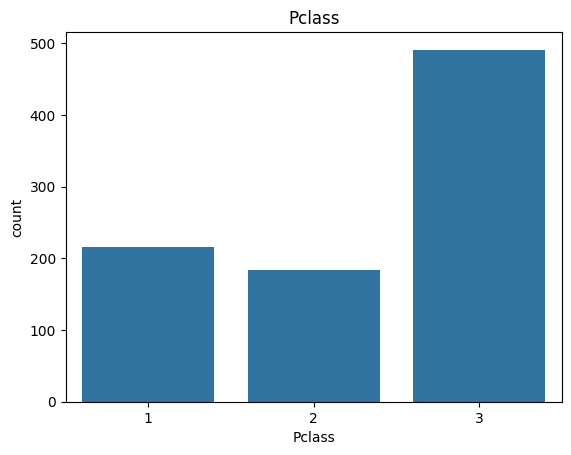

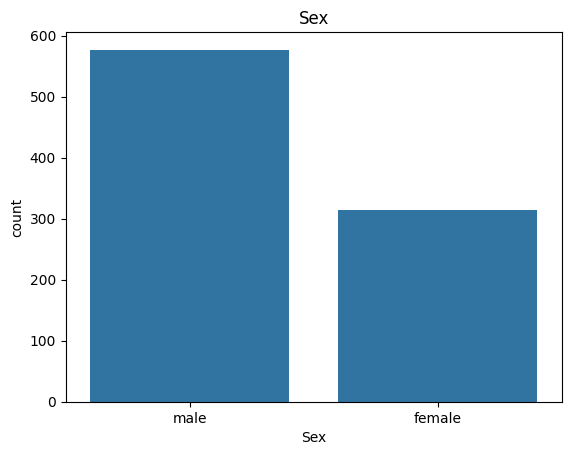

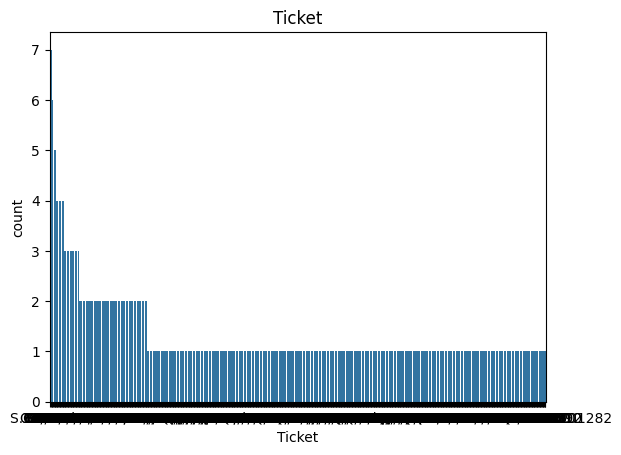

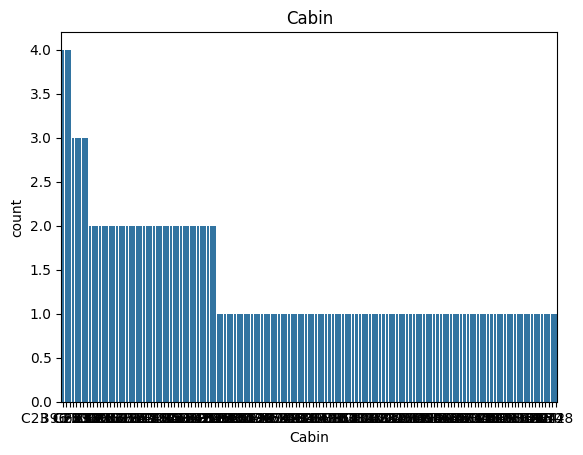

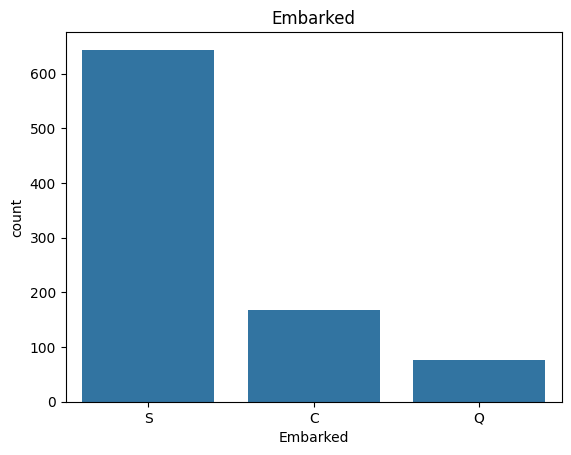

In [11]:
for i in df_categry.columns:
    sns.barplot(x=df_categry[i].value_counts().index, y=df_categry[i].value_counts()).set_title(i)
    plt.show()
    

In [12]:
#compare survial rate across categorical variables
print(pd.pivot_table(training, index='Survived', columns='Pclass',values='Ticket', aggfunc='count'), '\n')
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'), '\n')
print(pd.pivot_table(training, index='Survived', columns= 'Embarked', values='Ticket', aggfunc='count'), '\n')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Sex       female  male
Survived              
0             81   468
1            233   109 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 



## Feature Engineering

1. Cabin data: simply cabin data (Evaluvated if cabin letter or purchase of tickets across multiple cabin impacted survival)
2. Tickets: Do different ticket types impact durvival rates?
3. Does a person's title relate to survial rate?


In [13]:
df_categry.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [14]:
pd.pivot_table(training, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
# Creates categories based on cabin letter (n stand for null)

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

print(training['cabin_adv'].value_counts())

pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [16]:
#understand ticket values better
# Numeric vs non numeric
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [17]:
training['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [18]:
pd.set_option("display.max_rows", None)
training['ticket_letters'].value_counts()


ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
wep            3
sopp           3
ppp            2
sotono2        2
scah           2
swpp           2
sp             1
sca4           1
scow           1
fa             1
sop            1
sc             1
scahbasle      1
as             1
fc             1
casoton        1
Name: count, dtype: int64

In [22]:
pd.pivot_table(training, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')


numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [25]:
#Survival rate across different ticket types
pd.pivot_table(training, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [33]:
#feature engineering on person's title name
training.Name.head()
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(training['name_title'])

0                Mr
1               Mrs
2              Miss
3               Mrs
4                Mr
5                Mr
6                Mr
7            Master
8               Mrs
9               Mrs
10             Miss
11             Miss
12               Mr
13               Mr
14             Miss
15              Mrs
16           Master
17               Mr
18              Mrs
19              Mrs
20               Mr
21               Mr
22             Miss
23               Mr
24             Miss
25              Mrs
26               Mr
27               Mr
28             Miss
29               Mr
30              Don
31              Mrs
32             Miss
33               Mr
34               Mr
35               Mr
36               Mr
37               Mr
38             Miss
39             Miss
40              Mrs
41              Mrs
42               Mr
43             Miss
44             Miss
45               Mr
46               Mr
47             Miss
48               Mr
49              Mrs


In [35]:
training['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [40]:
# Survival rate across different titles
pd.pivot_table(training, index='Survived', columns='name_title', values='Name', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


## Data Preprocessing for model
1. Drop null values from embarked (only 2)
2. Include only relevent variable (Since we have limited data, Here we have excluded name, passanger ID so that there is reasonable number of features for the model)
3. Do categorial transformation on all data. Usually we would use a transformer, but with this approch we can ensure that our training and test data have the same coulmns. We also may be able to infer something about the shape of the test data through this method. I will stress this is generally not recommend outside of a compition
4. Impute data with mean for fare and age
5. Normalized fare using logrithm to give more semblance of normal distribution
6. Scaled data 0-1 with standard scaler

3

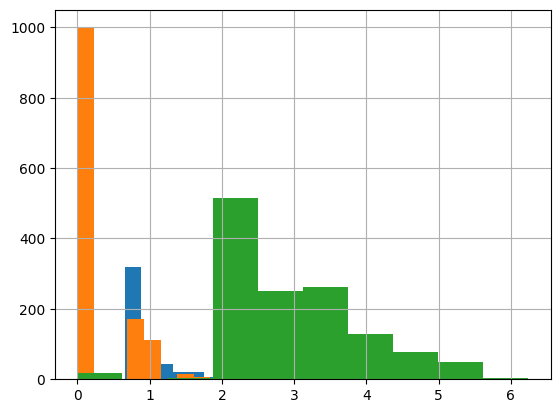

In [45]:
#create all categorial varibles that we did above for both training and test data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())   

#impute null for continuous data
all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.mean())

#drop null 'embarked' rows. Only 2 instance of in traning and 0 in test
all_data.dropna(subset=['Embarked'], inplace=True)

# log norm of siblings/spouses
all_data['norm_sibsp'] = np.log(all_data.SibSp + 1)
all_data['norm_sibsp'].hist()

# log norm of parents/children
all_data['norm_parch'] = np.log(all_data.Parch + 1)
all_data['norm_parch'].hist()

# log norm of fare
all_data['norm_fare'] = np.log1p(all_data.Fare)
all_data['norm_fare'].hist()

# convert fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#create dummy varibles from categories
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])
all_dummies.head()

#split to train test again
X_train = all_dummies[all_dummies.train_test ==1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test ==0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test ==1].Survived
y_train.shape

3